In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prophet
import seaborn as sn

In [2]:
data = pd.read_csv('merged_wtr-level_alerts_precip_hum_temp_press_wind_with-NaN_v4.csv')

In [3]:
data.drop('pancevo_water_level_cm',axis=1, inplace=True)

In [4]:
data


date  belgrade_water_level_cm  belgrade_flood_alert  \
0     2000-01-01                    461.0                     0   
1     2000-01-02                    474.0                     0   
2     2000-01-03                    478.0                     0   
3     2000-01-04                    474.0                     0   
4     2000-01-05                    464.0                     0   
...          ...                      ...                   ...   
8396  2022-12-27                    358.0                     0   
8397  2022-12-28                    356.0                     0   
8398  2022-12-29                    362.0                     0   
8399  2022-12-30                    370.0                     0   
8400  2022-12-31                    374.0                     0   

      pancevo_flood_alert  zemun_water_level_cm  zemun_flood_alert  \
0                     0.0                 502.0                0.0   
1                     0.0                 516.0                0.0   
2                     0.0                 520.0                0.0   
3                     0.0                 516.0                0.0   
4                     0.0                 508.0                0.0   
...                   ...                   ...                ...   
8396                  NaN                 388.0                0.0   
8397                  NaN                 388.0                0.0   
8398                  NaN                 396.0                0.0   
8399                  NaN                 404.0                0.0   
8400                  NaN                 408.0                0.0   

      belgrade_precipitation_mm  belgrade_pressure_hg  belgrade_temperature_c  \
0                           NaN             29.840065                    -2.6   
1                           0.0             29.925702                    -1.3   
2                           0.0             29.946373                    -1.1   
3                           NaN             29.792817                    -1.4   
4                           NaN             29.783958                    -0.9   
...                         ...                   ...                     ...   
8396                        NaN                   NaN                     NaN   
8397                        NaN                   NaN                     NaN   
8398                        NaN                   NaN                     NaN   
8399                        NaN                   NaN                     NaN   
8400                        NaN                   NaN                     NaN   

      belgrade_humidity_pct  belgrade_windspeed_kph  
0                      89.0                   11.52  
1                      85.0                    5.04  
2                      83.0                    5.04  
3                      93.0                    2.16  
4                      95.0                    5.76  
...                     ...                     ...  
8396                    NaN                     NaN  
8397                    NaN                     NaN  
8398                    NaN                     NaN  
8399                    NaN                     NaN  
8400                    NaN                     NaN  

[8401 rows x 11 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8401 non-null   object 
 1   belgrade_water_level_cm    8401 non-null   float64
 2   belgrade_flood_alert       8401 non-null   int64  
 3   pancevo_flood_alert        8036 non-null   float64
 4   zemun_water_level_cm       8262 non-null   float64
 5   zemun_flood_alert          8262 non-null   float64
 6   belgrade_precipitation_mm  5885 non-null   float64
 7   belgrade_pressure_hg       8036 non-null   float64
 8   belgrade_temperature_c     7671 non-null   float64
 9   belgrade_humidity_pct      7671 non-null   float64
 10  belgrade_windspeed_kph     7670 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 722.1+ KB


In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data = data.set_index("date")

In [8]:
data

belgrade_water_level_cm  belgrade_flood_alert  \
date                                                        
2000-01-01                    461.0                     0   
2000-01-02                    474.0                     0   
2000-01-03                    478.0                     0   
2000-01-04                    474.0                     0   
2000-01-05                    464.0                     0   
...                             ...                   ...   
2022-12-27                    358.0                     0   
2022-12-28                    356.0                     0   
2022-12-29                    362.0                     0   
2022-12-30                    370.0                     0   
2022-12-31                    374.0                     0   

            pancevo_flood_alert  zemun_water_level_cm  zemun_flood_alert  \
date                                                                       
2000-01-01                  0.0                 502.0                0.0   
2000-01-02                  0.0                 516.0                0.0   
2000-01-03                  0.0                 520.0                0.0   
2000-01-04                  0.0                 516.0                0.0   
2000-01-05                  0.0                 508.0                0.0   
...                         ...                   ...                ...   
2022-12-27                  NaN                 388.0                0.0   
2022-12-28                  NaN                 388.0                0.0   
2022-12-29                  NaN                 396.0                0.0   
2022-12-30                  NaN                 404.0                0.0   
2022-12-31                  NaN                 408.0                0.0   

            belgrade_precipitation_mm  belgrade_pressure_hg  \
date                                                          
2000-01-01                        NaN             29.840065   
2000-01-02                        0.0             29.925702   
2000-01-03                        0.0             29.946373   
2000-01-04                        NaN             29.792817   
2000-01-05                        NaN             29.783958   
...                               ...                   ...   
2022-12-27                        NaN                   NaN   
2022-12-28                        NaN                   NaN   
2022-12-29                        NaN                   NaN   
2022-12-30                        NaN                   NaN   
2022-12-31                        NaN                   NaN   

            belgrade_temperature_c  belgrade_humidity_pct  \
date                                                        
2000-01-01                    -2.6                   89.0   
2000-01-02                    -1.3                   85.0   
2000-01-03                    -1.1                   83.0   
2000-01-04                    -1.4                   93.0   
2000-01-05                    -0.9                   95.0   
...                            ...                    ...   
2022-12-27                     NaN                    NaN   
2022-12-28                     NaN                    NaN   
2022-12-29                     NaN                    NaN   
2022-12-30                     NaN                    NaN   
2022-12-31                     NaN                    NaN   

            belgrade_windspeed_kph  
date                                
2000-01-01                   11.52  
2000-01-02                    5.04  
2000-01-03                    5.04  
2000-01-04                    2.16  
2000-01-05                    5.76  
...                            ...  
2022-12-27                     NaN  
2022-12-28                     NaN  
2022-12-29                     NaN  
2022-12-30                     NaN  
2022-12-31                     NaN  

[8401 rows x 10 columns]

array([[<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>],
       [<AxesSubplot: xlabel='date'>]], dtype=object)

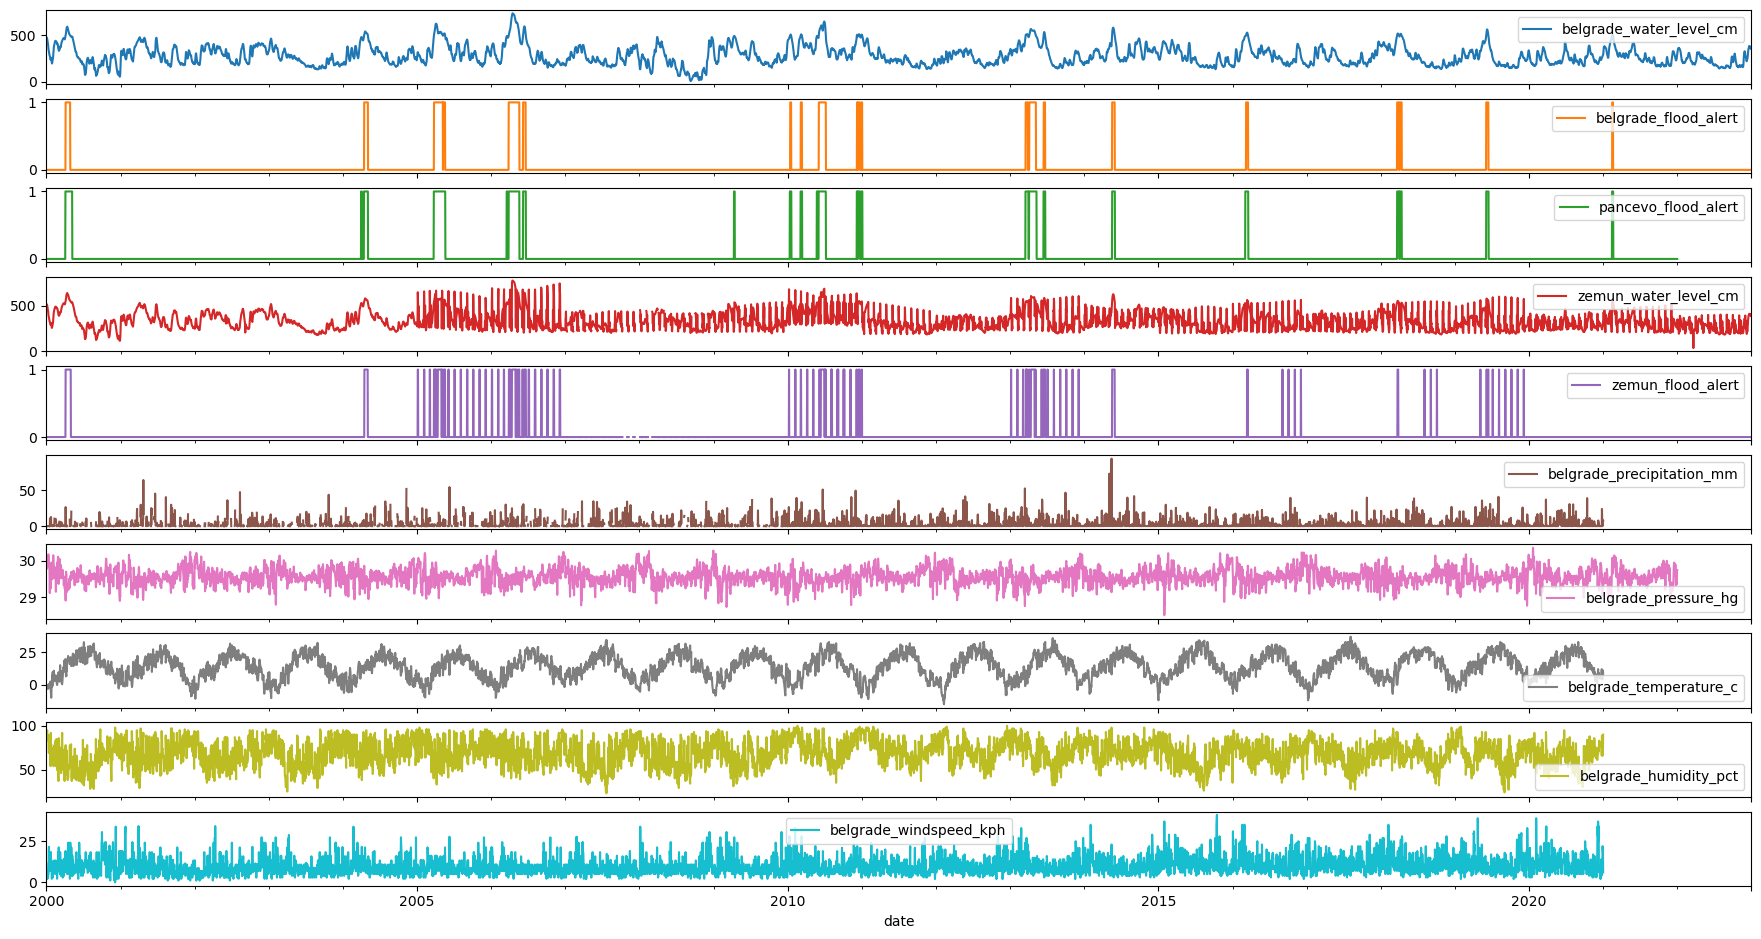

In [9]:
data.plot(figsize = (22, 16), subplots=True, layout=(14,1),)

In [10]:
data = data.loc["2010-01-01":"2020-12-31",:]

In [11]:
data.isnull().sum()

belgrade_water_level_cm      0
belgrade_flood_alert         0
pancevo_flood_alert          0
zemun_water_level_cm         0
zemun_flood_alert            0
belgrade_precipitation_mm    0
belgrade_pressure_hg         0
belgrade_temperature_c       0
belgrade_humidity_pct        0
belgrade_windspeed_kph       0
dtype: int64

In [12]:
data['y'] = data.shift(-1)['belgrade_water_level_cm']

C:\Users\Pctec\AppData\Local\Temp\ipykernel_14588\3911517493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data.shift(-1)['belgrade_water_level_cm']


In [13]:
data[['belgrade_water_level_cm','y']]

belgrade_water_level_cm      y
date                                      
2010-01-01                    447.0  452.0
2010-01-02                    452.0  454.0
2010-01-03                    454.0  455.0
2010-01-04                    455.0  459.0
2010-01-05                    459.0  463.0
...                             ...    ...
2020-12-27                    272.0  277.0
2020-12-28                    277.0  283.0
2020-12-29                    283.0  289.0
2020-12-30                    289.0  294.0
2020-12-31                    294.0    NaN

[4018 rows x 2 columns]

In [14]:
data = data.ffill()

In [15]:
data["ds"] = data.index

In [16]:
print(data["ds"].min())
print(data["ds"].max())

2010-01-01 00:00:00
2020-12-31 00:00:00


In [17]:
predictors = data.columns[~data.columns.isin(["y","belgrade_flood_alert","pancevo_flood_alert","zemun_flood_alert","ds"])]


In [18]:
predictors

Index(['belgrade_water_level_cm', 'zemun_water_level_cm',
       'belgrade_precipitation_mm', 'belgrade_pressure_hg',
       'belgrade_temperature_c', 'belgrade_humidity_pct',
       'belgrade_windspeed_kph'],
      dtype='object')

In [19]:
train = data[:"2019-12-31"]
test = data["2019-12-31":]

In [20]:
from prophet import Prophet
def fit_prophet(train):
    m = Prophet()
    for p in predictors:
        m.add_regressor(p)
    m.fit(train)
    return m
m = fit_prophet(train)

12:56:15 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
predictions = m.predict(test)

In [22]:
predictions

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-12-31  288.672593  320.563524  344.397682   288.672593   288.672593   
1   2020-01-01  288.672542  310.847145  334.166426   288.672542   288.672542   
2   2020-01-02  288.672491  305.582814  329.857243   288.672491   288.672491   
3   2020-01-03  288.672441  291.780407  316.159253   288.672441   288.672441   
4   2020-01-04  288.672390  272.051915  296.092397   288.672390   288.672390   
..         ...         ...         ...         ...          ...          ...   
362 2020-12-27  288.654281  263.460945  286.785878   288.554197   288.758519   
363 2020-12-28  288.654230  266.464554  289.382422   288.553860   288.759208   
364 2020-12-29  288.654180  271.079351  295.425728   288.553362   288.760005   
365 2020-12-30  288.654129  279.475340  302.698546   288.552771   288.760476   
366 2020-12-31  288.654078  286.426133  310.429419   288.552147   288.761120   

     additive_terms  additive_terms_lower  additive_terms_upper  \
0         44.040533             44.040533             44.040533   
1         34.039585             34.039585             34.039585   
2         28.824128             28.824128             28.824128   
3         15.177434             15.177434             15.177434   
4         -4.793410             -4.793410             -4.793410   
..              ...                   ...                   ...   
362      -13.840236            -13.840236            -13.840236   
363      -11.479833            -11.479833            -11.479833   
364       -5.058299             -5.058299             -5.058299   
365        2.014178              2.014178              2.014178   
366        9.250173              9.250173              9.250173   

     belgrade_humidity_pct  ...    yearly  yearly_lower  yearly_upper  \
0                -0.063716  ... -0.861803     -0.861803     -0.861803   
1                 1.648038  ... -0.846171     -0.846171     -0.846171   
2                 1.541053  ... -0.839973     -0.839973     -0.839973   
3                 0.471207  ... -0.842980     -0.842980     -0.842980   
4                 0.150253  ... -0.854870     -0.854870     -0.854870   
..                     ...  ...       ...           ...           ...   
362               0.364222  ... -0.978218     -0.978218     -0.978218   
363              -0.384670  ... -0.931843     -0.931843     -0.931843   
364               0.043268  ... -0.894770     -0.894770     -0.894770   
365               0.471207  ... -0.867201     -0.867201     -0.867201   
366               2.182961  ... -0.849188     -0.849188     -0.849188   

     zemun_water_level_cm  zemun_water_level_cm_lower  \
0               -0.140031                   -0.140031   
1               -0.097578                   -0.097578   
2                0.401244                    0.401244   
3                0.111149                    0.111149   
4                0.188980                    0.188980   
..                    ...                         ...   
362              0.316338                    0.316338   
363              0.270348                    0.270348   
364              0.203131                    0.203131   
365              0.114687                    0.114687   
366              0.033319                    0.033319   

     zemun_water_level_cm_upper  multiplicative_terms  \
0                     -0.140031                   0.0   
1                     -0.097578                   0.0   
2                      0.401244                   0.0   
3                      0.111149                   0.0   
4                      0.188980                   0.0   
..                          ...                   ...   
362                    0.316338                   0.0   
363                    0.270348                   0.0   
364                    0.203131                   0.0   
365                    0.114687                   0.0   
366                    0.033319                   0.0   


In [23]:
from prophet.plot import plot_plotly,plot_components_plotly,plot_cross_validation_metric
plot_components_plotly(m,predictions)

In [24]:
from prophet.utilities import regressor_coefficients

In [25]:
regressor_coefficients(m)

regressor regressor_mode      center  coef_lower      coef  \
0    belgrade_water_level_cm       additive  288.462212    0.992779  0.992779   
1       zemun_water_level_cm       additive  335.418127   -0.003538 -0.003538   
2  belgrade_precipitation_mm       additive    2.777848    0.020523  0.020523   
3       belgrade_pressure_hg       additive   29.556875   -4.538657 -4.538657   
4     belgrade_temperature_c       additive   14.564348   -0.097122 -0.097122   
5      belgrade_humidity_pct       additive   69.595564    0.106985  0.106985   
6     belgrade_windspeed_kph       additive   10.664294   -0.020483 -0.020483   

   coef_upper  
0    0.992779  
1   -0.003538  
2    0.020523  
3   -4.538657  
4   -0.097122  
5    0.106985  
6   -0.020483

In [26]:
predictions.index = test.index
predictions['actual']= test['y']

In [27]:
def mse(predictions,actual_label="actual",pred_label="yhat"):
    se = ((predictions[actual_label]-predictions[pred_label])**2)
    print(se.mean())
mse(predictions,actual_label="actual",pred_label="yhat")

89.99823177152406


In [28]:
from prophet.diagnostics import cross_validation

In [29]:
m = fit_prophet(data)
cv = cross_validation(m, initial=f'{365 * 8} days', period='180 days', horizon = '180 days', parallel="processes")

12:56:19 - cmdstanpy - INFO - Chain [1] start processing
12:56:20 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
mse(cv, actual_label="y")

79.69131796099609


In [31]:
cv

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0    2018-01-17  421.248867  408.269921  432.762171  409.0 2018-01-16
1    2018-01-18  409.580380  397.923285  421.569747  402.0 2018-01-16
2    2018-01-19  402.715110  390.474575  415.020913  391.0 2018-01-16
3    2018-01-20  393.207020  380.580747  405.250277  386.0 2018-01-16
4    2018-01-21  389.532233  377.637635  401.841267  384.0 2018-01-16
...         ...         ...         ...         ...    ...        ...
1075 2020-12-27  275.139285  262.757287  287.817074  277.0 2020-07-04
1076 2020-12-28  277.521184  265.970061  289.504263  283.0 2020-07-04
1077 2020-12-29  283.704712  271.362946  296.097053  289.0 2020-07-04
1078 2020-12-30  290.719716  278.152410  302.084694  294.0 2020-07-04
1079 2020-12-31  297.676050  285.952266  310.709053  294.0 2020-07-04

[1080 rows x 6 columns]

In [32]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(cv)
df_p

horizon         mse       rmse       mae      mape     mdape     smape  \
0    18 days   30.467373   5.519726  4.323146  0.018228  0.015509  0.018068   
1    19 days   31.335912   5.597849  4.405345  0.018780  0.016425  0.018625   
2    20 days   36.075228   6.006266  4.582523  0.019388  0.016635  0.019261   
3    21 days   41.898271   6.472887  4.769512  0.020068  0.016635  0.019974   
4    22 days   43.911121   6.626547  4.884182  0.020494  0.016786  0.020422   
..       ...         ...        ...       ...       ...       ...       ...   
158 176 days  142.723867  11.946709  8.896834  0.031992  0.027322  0.032369   
159 177 days  144.046224  12.001926  8.948160  0.032151  0.027079  0.032518   
160 178 days  146.941514  12.121943  9.000167  0.032325  0.026364  0.032621   
161 179 days  145.229379  12.051115  8.874605  0.031948  0.025705  0.032207   
162 180 days  144.649803  12.027045  8.792304  0.031718  0.025345  0.031964   

     coverage  
0    0.981481  
1    0.972222  
2    0.962963  
3    0.953704  
4    0.944444  
..        ...  
158  0.842593  
159  0.842593  
160  0.824074  
161  0.833333  
162  0.833333  

[163 rows x 8 columns]

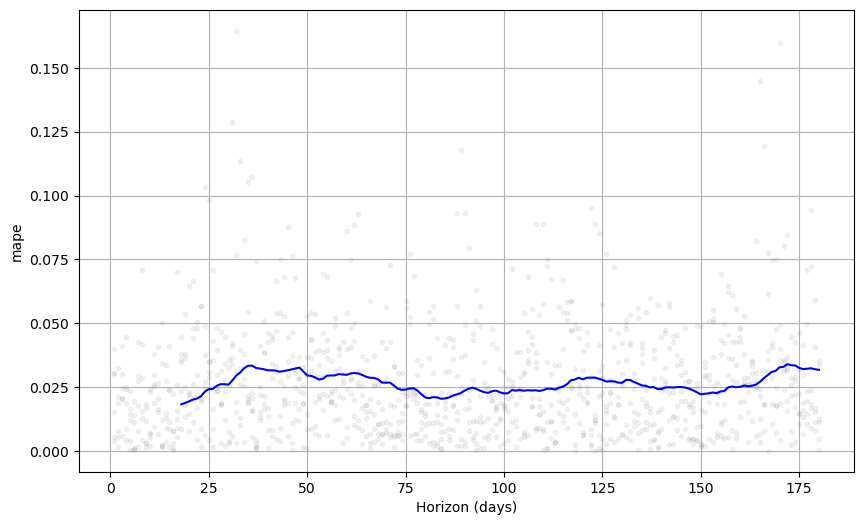

In [33]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv, metric='mape')


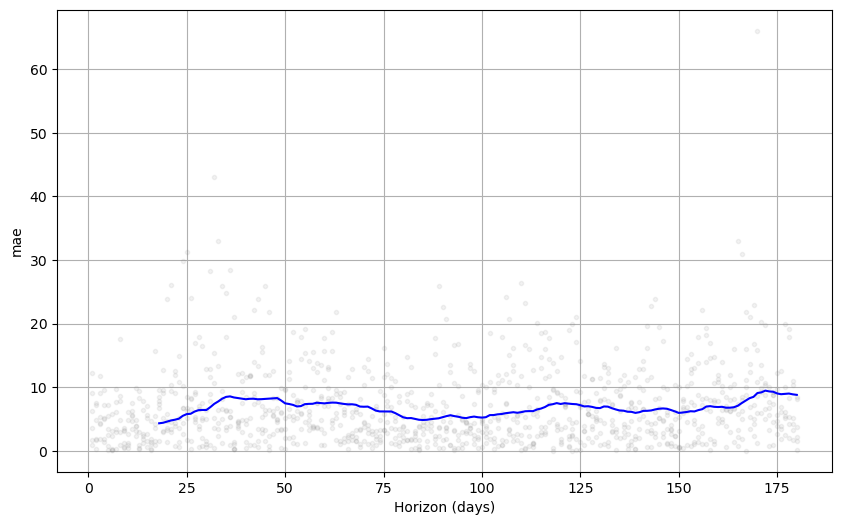

In [34]:
fig = plot_cross_validation_metric(cv, metric='mae')


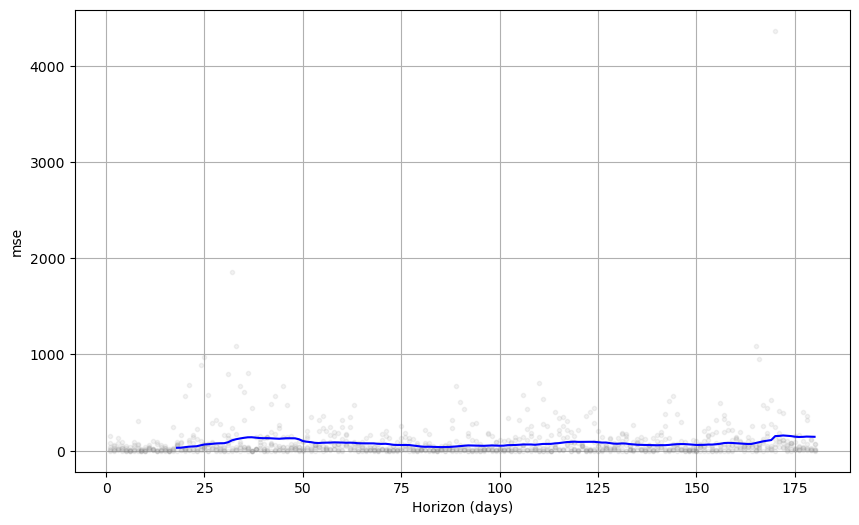

In [35]:
fig = plot_cross_validation_metric(cv, metric='mse')


In [36]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
actual_label="actual"
pred_label="yhat"
mape = mean_absolute_percentage_error(predictions[actual_label],predictions[pred_label])*100
mape

2.669364667778496

In [37]:
mae = mean_absolute_error(predictions[actual_label],predictions[pred_label])
mae

6.776165056627617

Text(0.5, 1.0, 'Real vs Prediction - MAE 6.776165056627617 -MAPE 2.669364667778496')

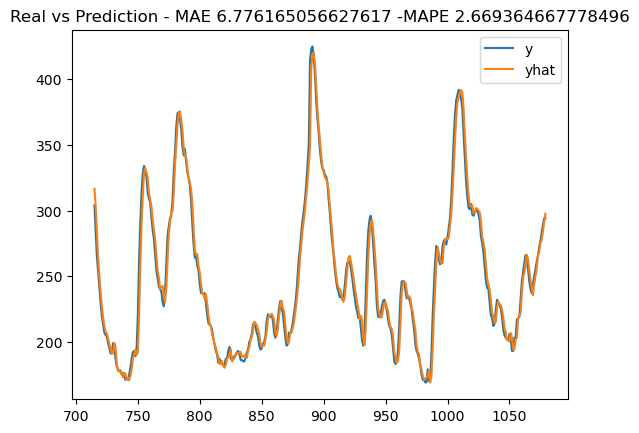

In [38]:
cv[["y", "yhat"]][-365:].plot()
plt.title(f'Real vs Prediction - MAE {mae} -MAPE {mape}', fontsize=12)

In [39]:
# Predict one day ahead with high accuracy
m = fit_prophet(data)
m.predict(data.iloc[-1:])

12:56:33 - cmdstanpy - INFO - Chain [1] start processing
12:56:33 - cmdstanpy - INFO - Chain [1] done processing


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2020-12-31  285.213912  284.900241  308.951903   285.213912   285.213912   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0       12.290389             12.290389             12.290389   

   belgrade_humidity_pct  ...    yearly  yearly_lower  yearly_upper  \
0               2.203836  ... -1.498005     -1.498005     -1.498005   

   zemun_water_level_cm  zemun_water_level_cm_lower  \
0               0.01618                     0.01618   

   zemun_water_level_cm_upper  multiplicative_terms  \
0                     0.01618                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  297.504301  

[1 rows x 43 columns]

In [40]:
# Predict multiple days ahead with lower accuracy
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

12:56:34 - cmdstanpy - INFO - Chain [1] start processing
12:56:35 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
from prophet.plot import plot_plotly

plot_plotly(m, forecast)